In [4]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
import sklearn
from torch.utils.data import DataLoader

### Load data
Load the training and test data that was created in the notebook 'create_data_sets.ipynb'

In [5]:
train_big = pd.read_csv('datasets/train_big.csv')
# select only interesting columns to train on
train_big = train_big.drop(['Unnamed: 0','id','type','family'],axis=1)
train_big.index = train_big['date']
train_big = train_big.drop('date',axis=1)
# permute columns (thats just my prefered order without any reason)
col_lst = ['store_nbr','family_id','onpromotion','day','weekday','month','year','holiday','oilprice','sales']
train_big = train_big[col_lst]

# do the same for the test frame

test_big = pd.read_csv('datasets/test_big.csv')
# select only interesting columns to train on
test_big = test_big.drop(['Unnamed: 0','id','type','family'],axis=1)
test_big.index = test_big['date']
test_big = test_big.drop('date',axis=1)
# permute columns (thats just my prefered order without any reason)
col_lst = ['store_nbr','family_id','onpromotion','day','weekday','month','year','holiday','oilprice']
test_big = test_big[col_lst]

In [6]:
train_big

,store_nbr,family_id,onpromotion,day,weekday,month,year,holiday,oilprice,sales
date,,,,,,,,,,
2013-01-01,1,0,0,1,1,1,2013,2,93.14,0.000
2013-01-01,1,1,0,1,1,1,2013,2,93.14,0.000
2013-01-01,1,2,0,1,1,1,2013,2,93.14,0.000
2013-01-01,1,3,0,1,1,1,2013,2,93.14,0.000
2013-01-01,1,4,0,1,1,1,2013,2,93.14,0.000
...,...,...,...,...,...,...,...,...,...,...
2017-08-15,9,28,0,15,1,8,2017,0,47.57,438.133
2017-08-15,9,29,1,15,1,8,2017,0,47.57,154.553
2017-08-15,9,30,148,15,1,8,2017,0,47.57,2419.729


In [4]:
test_big

,store_nbr,family_id,onpromotion,day,weekday,month,year,holiday,oilprice
date,,,,,,,,,
2017-08-16,1,0,0,16,2,8,2017,0,46.80
2017-08-16,1,1,0,16,2,8,2017,0,46.80
2017-08-16,1,2,2,16,2,8,2017,0,46.80
2017-08-16,1,3,20,16,2,8,2017,0,46.80
2017-08-16,1,4,0,16,2,8,2017,0,46.80
...,...,...,...,...,...,...,...,...,...
2017-08-31,9,28,1,31,3,8,2017,0,47.26
2017-08-31,9,29,0,31,3,8,2017,0,47.26
2017-08-31,9,30,1,31,3,8,2017,0,47.26


In [7]:
#split train_big in train and test set
test_start = "2016-08-16"

df_train = train_big.loc[:test_start].copy()
df_test = train_big.loc[test_start:].copy()

#compte percentage of training test split
p = len(df_train)/len(train_big)
print('Size of training set is %s percent of total data.'%np.round(p,2))

Size of training set is 0.78 percent of total data.


### Standardize data
Hier schon überlegen ob man nur (stor_nbr,family_id) betrachted oder wie man am besten standardisiert.

In [19]:
features = ['store_nbr','family_id','onpromotion','day','weekday','month','year','holiday','oilprice']
target = 'sales'

In [12]:
from sklearn import preprocessing
store_nbr = 1
family_id = 32

### Different Standardisations

In [12]:
#standardize features
X = df_train[features]
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
df_train_scaled = df_train.copy()
df_train_scaled[features] = pd.DataFrame(X_scaled,index=X.index,columns = X.columns) 

#standardize test set with same scaler that was used for training data 
X_test = df_test[features]
X_test_scaled = scaler.transform(X_test)
df_test_scaled = df_test.copy()
df_test_scaled[features]  = pd.DataFrame(X_test_scaled,index=X_test.index,columns = X_test.columns)


In [10]:
#standardize features and targets
scaler = preprocessing.StandardScaler().fit(df_train)
X_scaled = scaler.transform(df_train)
df_train_scaled = pd.DataFrame(X_scaled,index=df_train.index,columns = df_train.columns) 

#standardize test set with same scaler that was used for training data 
X_test_scaled = scaler.transform(df_test)
df_test_scaled  = pd.DataFrame(X_test_scaled,index=df_test.index,columns = df_test.columns)

In [14]:
#standardize features and targets with MinMaxScaler (prefered version so far)
scaler = preprocessing.MinMaxScaler().fit(df_train)
X_scaled = scaler.transform(df_train)
df_train_scaled = pd.DataFrame(X_scaled,index=df_train.index,columns = df_train.columns) 

#standardize test set with same scaler that was used for training data 
X_test_scaled = scaler.transform(df_test)
df_test_scaled  = pd.DataFrame(X_test_scaled,index=df_test.index,columns = df_test.columns)

In [16]:
df_train_scaled

,store_nbr,family_id,onpromotion,day,weekday,month,year,holiday,oilprice,sales
date,,,,,,,,,,
2013-01-01,0.000000,0.00000,0.000000,0.0,0.166667,0.000000,0.0,1.0,0.792965,0.000000
2013-01-01,0.000000,0.03125,0.000000,0.0,0.166667,0.000000,0.0,1.0,0.792965,0.000000
2013-01-01,0.000000,0.06250,0.000000,0.0,0.166667,0.000000,0.0,1.0,0.792965,0.000000
2013-01-01,0.000000,0.09375,0.000000,0.0,0.166667,0.000000,0.0,1.0,0.792965,0.000000
2013-01-01,0.000000,0.12500,0.000000,0.0,0.166667,0.000000,0.0,1.0,0.792965,0.000000
...,...,...,...,...,...,...,...,...,...,...
2016-08-16,0.150943,0.87500,0.000000,0.5,0.166667,0.636364,1.0,0.0,0.241383,0.003806
2016-08-16,0.150943,0.90625,0.002699,0.5,0.166667,0.636364,1.0,0.0,0.241383,0.000832
2016-08-16,0.150943,0.93750,0.184885,0.5,0.166667,0.636364,1.0,0.0,0.241383,0.018930


Create data class such that pytorch dataloader can handle the data

### Datastructures for LSTM

In [20]:
import torch
from torch.utils.data import Dataset, DataLoader

class SequenceDataset(Dataset):
    def __init__(self, dataframe, target, features, sequence_length=5):
        self.features = features
        self.target = target
        self.sequence_length = sequence_length
        self.y = torch.tensor(dataframe[target].values).float()
        self.X = torch.tensor(dataframe[features].values).float()

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, i): 
        if i >= self.sequence_length - 1:
            i_start = i - self.sequence_length + 1
            x = self.X[i_start:(i + 1), :]
        else:
            padding = self.X[0].repeat(self.sequence_length - i - 1, 1)
            x = self.X[0:(i + 1), :]
            x = torch.cat((padding, x), 0)

        return x, self.y[i]


In [21]:
train_dataset = SequenceDataset(df_train_scaled,target,features)

In [22]:
torch.manual_seed(99)

train_loader = DataLoader(train_dataset, batch_size=3, shuffle=True)

X, y = next(iter(train_loader))
print(X.shape)
print(X)


torch.Size([3, 5, 9])
tensor([[[0.8868, 0.4688, 0.0000, 0.8333, 1.0000, 0.2727, 0.6667, 0.5000,
          0.3495],
         [0.8868, 0.5000, 0.0000, 0.8333, 1.0000, 0.2727, 0.6667, 0.5000,
          0.3495],
         [0.8868, 0.5312, 0.0000, 0.8333, 1.0000, 0.2727, 0.6667, 0.5000,
          0.3495],
         [0.8868, 0.5625, 0.0000, 0.8333, 1.0000, 0.2727, 0.6667, 0.5000,
          0.3495],
         [0.8868, 0.5938, 0.0000, 0.8333, 1.0000, 0.2727, 0.6667, 0.5000,
          0.3495]],

        [[0.2453, 0.7812, 0.0000, 0.1333, 0.5000, 0.0909, 0.6667, 0.0000,
          0.2877],
         [0.2453, 0.8125, 0.0000, 0.1333, 0.5000, 0.0909, 0.6667, 0.0000,
          0.2877],
         [0.2453, 0.8438, 0.0000, 0.1333, 0.5000, 0.0909, 0.6667, 0.0000,
          0.2877],
         [0.2453, 0.8750, 0.0202, 0.1333, 0.5000, 0.0909, 0.6667, 0.0000,
          0.2877],
         [0.2453, 0.9062, 0.0000, 0.1333, 0.5000, 0.0909, 0.6667, 0.0000,
          0.2877]],

        [[0.1698, 0.6562, 0.0000, 0.6667, 0.

In [23]:
y

tensor([0.0000, 0.0006, 0.0014])

### Prepare train/test set

In [37]:
torch.manual_seed(101)

batch_size = 1
sequence_length = 16

train_dataset = SequenceDataset(
    df_train_scaled,
    target=target,
    features=features,
    sequence_length=sequence_length
)
test_dataset = SequenceDataset(
    df_test_scaled,
    target=target,
    features=features,
    sequence_length=sequence_length
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

X, y = next(iter(train_loader))

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: torch.Size([1, 16, 9])
Target shape: torch.Size([1])


### Build network structure

In [38]:
from torch import nn

class ShallowRegressionLSTM(nn.Module):
    def __init__(self, num_features, hidden_units):
        super().__init__()
        self.num_features = num_features  
        self.hidden_units = hidden_units
        self.num_layers = 1

        self.lstm = nn.LSTM(
            input_size=num_features,
            hidden_size=hidden_units,
            batch_first=True,
            num_layers=self.num_layers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()

        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn[0]).flatten()  # First dim of Hn is num_layers, which is set to 1 above.

        return out



### Build model and train

In [26]:
class RMSLELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self, pred, actual):
        return torch.sqrt(self.mse(torch.log(pred + 1), torch.log(actual + 1)))

In [39]:
learning_rate = 0.001 #5e-5
num_hidden_units = 16
num_epoch = 1
model = ShallowRegressionLSTM(num_features=len(features), hidden_units=num_hidden_units)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [40]:
def train_model(data_loader, model, loss_function, optimizer):
    num_batches = len(data_loader)
    total_loss = 0
    model.train()

    for X, y in data_loader:
        output = model(X)
        loss = loss_function(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / num_batches
    print(f"Train loss: {avg_loss}")
    return avg_loss

def test_model(data_loader, model, loss_function):

    num_batches = len(data_loader)
    total_loss = 0

    model.eval()
    with torch.no_grad():
        for X, y in data_loader:
            output = model(X)
            total_loss += loss_function(output, y).item()

    avg_loss = total_loss / num_batches
    print(f"Test loss: {avg_loss}")
    return avg_loss


print("Untrained test\n--------")
test_model(test_loader, model, loss_function)
print()

train_loss_lst = []
test_loss_lst =  []
for ix_epoch in range(num_epoch):
    print(f"Epoch {ix_epoch}\n---------")
    train_loss = train_model(train_loader, model, loss_function, optimizer=optimizer)
    test_loss = test_model(test_loader, model, loss_function)
    train_loss_lst.append(train_loss)
    test_loss_lst.append(test_loss)
    print()



Untrained test
--------
Test loss: 0.011701181255409199

Epoch 0
---------
Train loss: 3.5061900741105986e-05
Test loss: 5.6036234248283026e-05



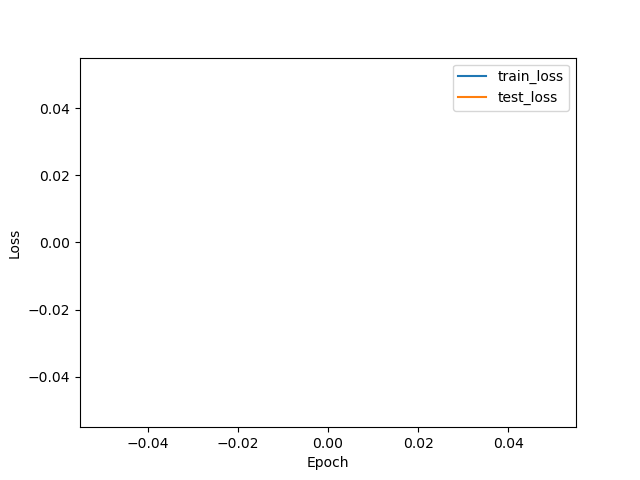

In [32]:
fig = plt.figure()
plt.plot(train_loss_lst,label='train_loss')
plt.plot(test_loss_lst,label='test_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

### Predict future sales

In [41]:
def predict(data_loader, model):

    output = torch.tensor([])
    model.eval()
    with torch.no_grad():
        for X, _ in data_loader:
            y_star = model(X)
            output = torch.cat((output, y_star), 0)

    return output

In [43]:
test_big['sales']=0 #include dummy sales that we can use same scaler 
X_pred_scaled = scaler.transform(test_big)
df_pred_scaled  = pd.DataFrame(X_pred_scaled,index=test_big.index,columns = test_big.columns)

In [44]:
# put data into correct format for LSTM model
pred_dataset = SequenceDataset(
    df_pred_scaled,
    target=target,
    features=features,
    sequence_length=sequence_length)

pred_eval_loader = DataLoader(pred_dataset, batch_size=batch_size, shuffle=False)
#make prediction
future_sales_pred = predict(pred_eval_loader, model).numpy()

In [45]:
df_pred_scaled['sales'] = future_sales_pred
X_back_transform = scaler.inverse_transform(df_pred_scaled)
df_pred = pd.DataFrame(X_back_transform,index=df_pred_scaled.index,columns=df_pred_scaled.columns)


In [51]:
df_pred.loc[(df_pred['store_nbr']==8)&(df_pred['family_id']==2)]

,store_nbr,family_id,onpromotion,day,weekday,month,year,holiday,oilprice,sales
date,,,,,,,,,,
2017-08-16,8.0,2.0,2.0,16.0,2.0,8.0,2017.0,0.0,46.800000,-222.352794
2017-08-17,8.0,2.0,0.0,17.0,3.0,8.0,2017.0,0.0,47.070000,-494.290309
2017-08-18,8.0,2.0,1.0,18.0,4.0,8.0,2017.0,0.0,48.590000,-498.734275
2017-08-19,8.0,2.0,1.0,19.0,5.0,8.0,2017.0,1.0,48.190000,-571.107506
2017-08-20,8.0,2.0,2.0,20.0,6.0,8.0,2017.0,1.0,47.790000,-575.541251
2017-08-21,8.0,2.0,2.0,21.0,0.0,8.0,2017.0,0.0,47.390000,-395.504633
2017-08-22,8.0,2.0,2.0,22.0,1.0,8.0,2017.0,0.0,47.650000,-412.924609
2017-08-23,8.0,2.0,2.0,23.0,2.0,8.0,2017.0,0.0,48.450000,-302.957700
2017-08-24,8.0,2.0,1.0,24.0,3.0,8.0,2017.0,0.0,47.240000,-473.560472


In [47]:
df_for_id = pd.read_csv('datasets/test_big.csv')
pred = df_pred['sales'].values
#put in format for submission
submission_lstm = pd.DataFrame({'id':df_for_id['id'],'sales':pred}) 

# store submission
submission_lstm.to_csv('predicted_data/submission_lstm.csv',index=False)

### Summary
Indeed one can see that the results dont make any sense because the sales get way to high or negative. This was somehow expected because the lstm wasnt build for computing all the data at once but more for the time series data that come from one store and family. Applying the lstm on the entire dataset was more for curiosity purposes. Furthermore the computation time to optimize the lstm takes a very long time hence it was only possible to run 1 epoch for optimization which might be also a reason for the poor behaviour. So for future research we will focuse on the lstm model that is applied on time series from one stor and family.